In [32]:
# Libraries

# Data preparetion
import pandas as pd
import numpy as np

# Graphs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Model building 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection,linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data

In [4]:
credit_data = pd.read_csv("./credit_risk_dataset.csv")
credit_data.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# Data Analysis 

In [5]:
shape = credit_data.shape
print("There are {} rows and {} features.".format(shape[0], shape[1]))
print(credit_data.dtypes)

There are 32581 rows and 12 features.
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


There are mixture of both numerical and categorical columns. To explore categorical columns we can use boxplots 
and for numerical columns we can use scatter plot to explore that.

In [6]:
credit_data.describe(include = 'all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


From above describe function we could see person_emp_length and loan_int_rate have some null values. Also there are person with age of 144 and also there's some person with employement length of 123 years which sounds to be outliers. Let's do scatter plot to see the outliers and crosstab for categorical variables

In [7]:
#check for null values and fill the value for that
credit_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

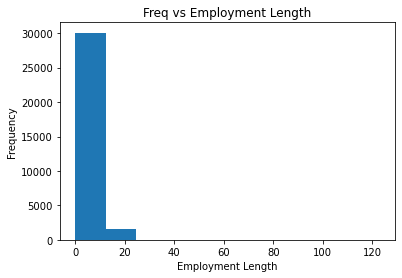

Text(0.5, 1.0, 'Freq vs Interest Rate')

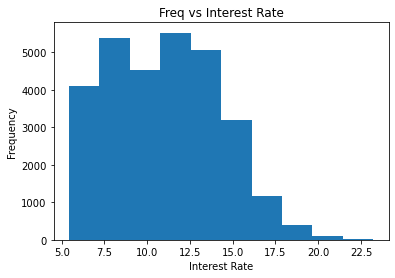

In [8]:
#How to fill this null values? Check the distribution of data and fill the default value
plt.hist(credit_data['person_emp_length'])
plt.xlabel("Employment Length")
plt.ylabel("Frequency")
plt.title("Freq vs Employment Length")
plt.show()

plt.hist(credit_data['loan_int_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Freq vs Interest Rate")

For applying logistic regression we need to fill this null values whereas for random forest model will take care of null values as employ length and interest rate aren't normally distributed we will use median to fill null values

In [9]:
emp_len_null = credit_data[credit_data['person_emp_length'].isnull()].index
int_rate_null = credit_data[credit_data['loan_int_rate'].isnull()].index

credit_data['person_emp_length'].fillna((credit_data['person_emp_length'].median()), inplace=True)
credit_data['loan_int_rate'].fillna((credit_data['loan_int_rate'].median()), inplace = True)

In [10]:
#check for null values and fill the value for that
credit_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

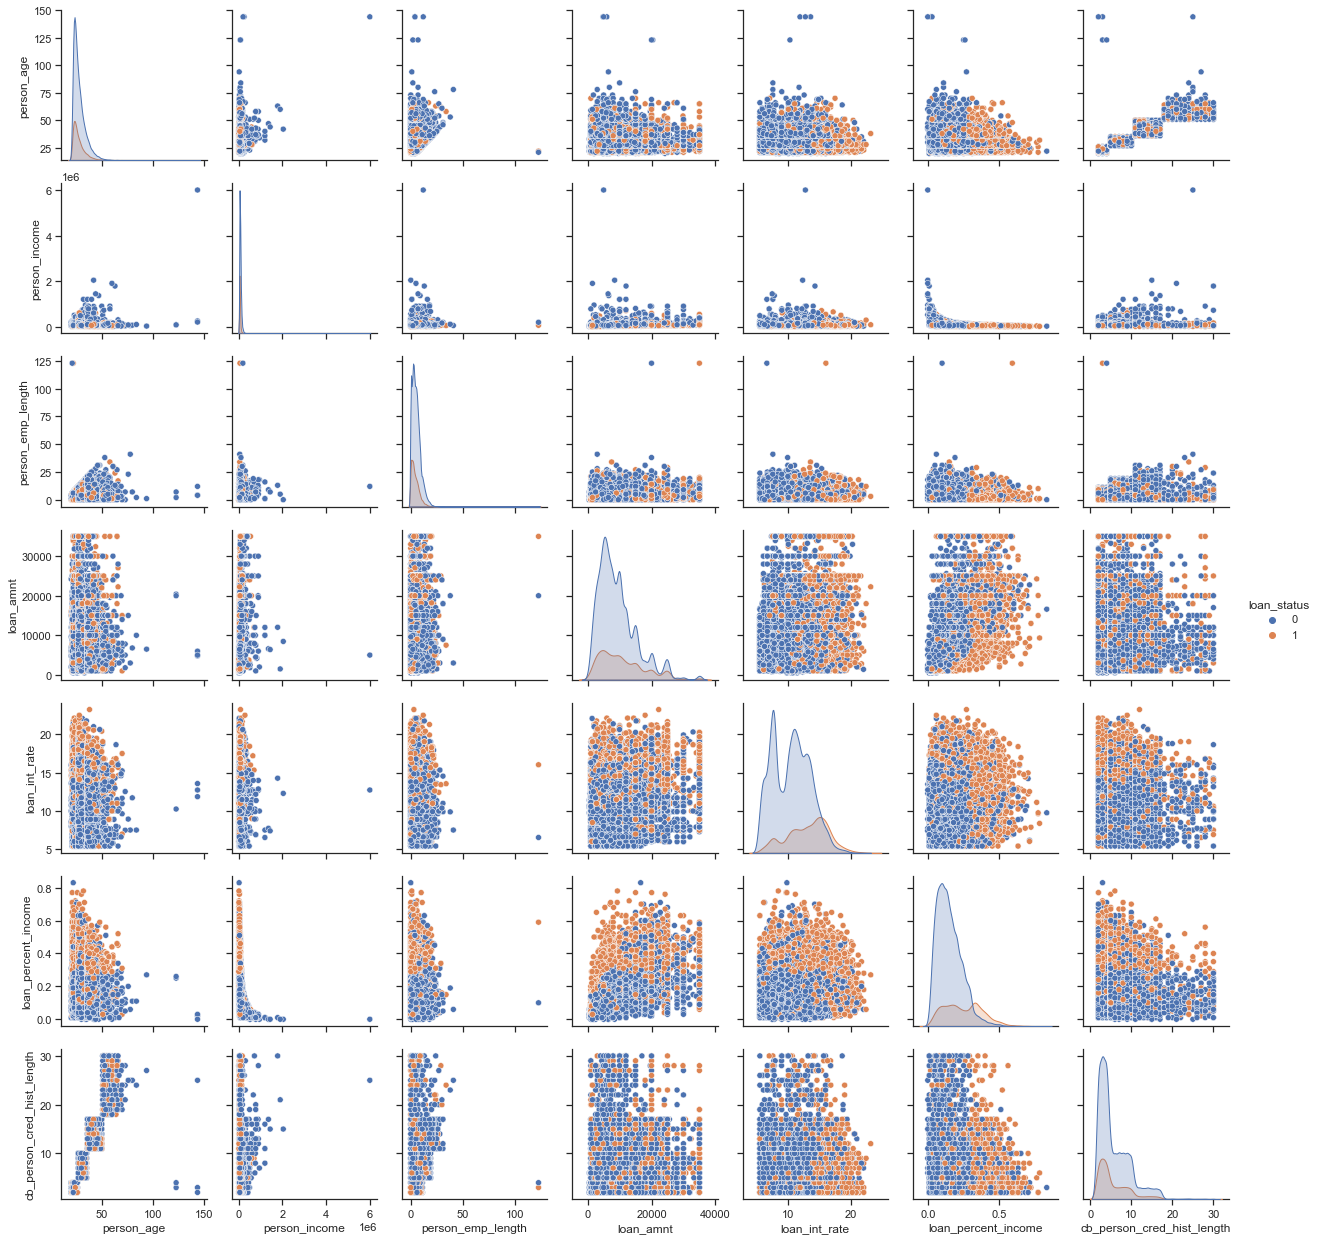

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(credit_data, hue="loan_status")

This parplot gives some insights for model features.  The person with higher age unlikely to apply for new loans so we will remove them. 

Interest rate is higher for person who's higher percentage of income goes for loan repayment. If person age is less than 20 then they are less likely to be employed or might be their salary is lower compared to the elders so they are likely to default. 

Person income, person age and person_emp_length will have multicollinerarity problem. 

In [11]:
# Clean the outliers
credit_data = credit_data[credit_data['person_age']<=100]

In [12]:
pd.crosstab(credit_data['cb_person_default_on_file'], credit_data['loan_grade'])

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,10777,10448,3200,1750,499,129,28
Y,0,0,3256,1876,465,112,36


In [13]:
pd.crosstab(credit_data['loan_status'], credit_data['loan_grade'])

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,9704,8747,5117,1485,343,71,1
1,1073,1701,1339,2141,621,170,63


From above crosstabs we could see loans given to good credit history (grade A,B) people are also defaulted. Let's find out the percentage from confusion matrix.  

In [14]:
# note 0 is non default and 1 is default
default_file = pd.crosstab(credit_data['cb_person_default_on_file'], credit_data['loan_status'])
default_file

loan_status,0,1
cb_person_default_on_file,,
N,21895,4936
Y,3573,2172


In [15]:

total1 = default_file.iloc[0].sum()
defaulted1 = default_file.iloc[0,1]

total2 = default_file.iloc[1].sum()
defaulted2 = default_file.iloc[1,1]

first_default = round(defaulted1 / total1 * 100, 2)
second_default = round(defaulted2 / total2 * 100, 2)

print(first_default, "% of clients defaulted for the first time.")
print(second_default, "% of clients who had previously defaulted, defaulted again.")

18.4 % of clients defaulted for the first time.
37.81 % of clients who had previously defaulted, defaulted again.


In [16]:
interest = pd.crosstab(credit_data['cb_person_default_on_file'], credit_data['loan_intent'], 
            values = credit_data['loan_int_rate'], aggfunc = 'median')

interest

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,10.62,10.62,10.74,10.74,10.65,10.65
Y,14.09,13.85,14.09,14.11,14.10,13.99


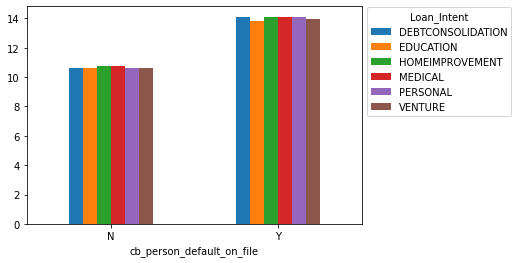

In [17]:

cht = interest.plot(kind='bar', rot=0)
cht.legend(title='Loan_Intent', bbox_to_anchor=(1, 1.02),
         loc='upper left')

In [18]:
income = pd.crosstab(credit_data['loan_status'], credit_data['loan_intent'], 
            values = credit_data['loan_percent_income'], aggfunc = 'median')

income

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_status,,,,,,
0,0.13,0.14,0.13,0.14,0.13,0.14
1,0.22,0.26,0.20,0.23,0.25,0.31


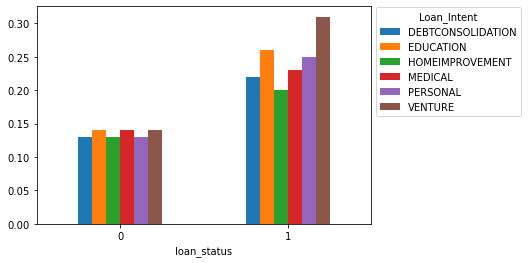

In [19]:
cht = income.plot(kind='bar', rot=0)
cht.legend(title='Loan_Intent', bbox_to_anchor=(1, 1.02),
         loc='upper left')

Person with default in credit history likely to provided loan with higher interest rate than who haven't defaulted before. 

Also currently defaulted people paying higher percentage of their salary to the loan.

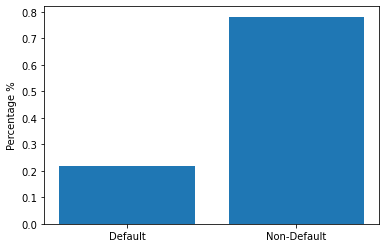

In [20]:
num_data = len(credit_data["loan_status"])
num_def = len(credit_data[credit_data["loan_status"]== 1])
percent_def = num_def/num_data
percent_non_def = 1- percent_def
label = ["Default", "Non-Default"]
percent = [percent_def, percent_non_def]
plt.bar(label, percent)
plt.ylabel('Percentage %')
plt.show()

Percentage of non defaulted data is higher than defaulted in our dataset. THere's definetly imbalance in the dataset but in real world it's even harder to acheive this 8:2 ratio. So for now we are ignoring this. 

## Convert categorical columns

In [21]:
# one hot encoding categorical variables
num_col = credit_data.select_dtypes(exclude = 'object')
char_col = credit_data.select_dtypes(include = 'object')

encoded_char_col = pd.get_dummies(char_col)

credit_data_encoded = pd.concat([num_col, encoded_char_col], axis=1)
credit_data_encoded

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


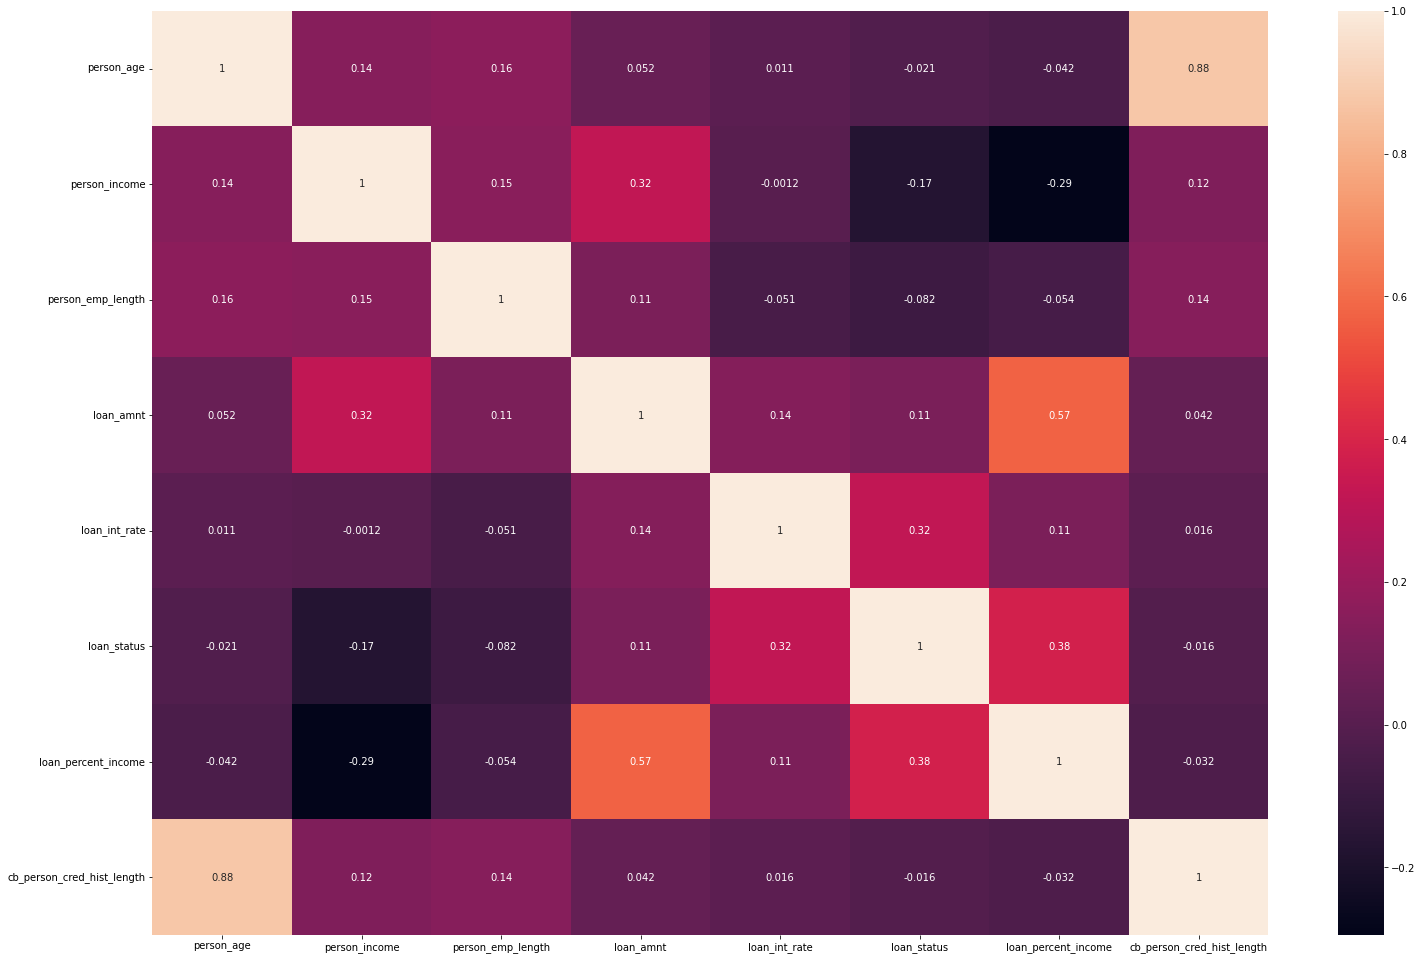

In [22]:
plt.subplots(figsize=(25,17))
sns.heatmap(credit_data.corr(), annot=True)
plt.show()

Above correlation matrix doesn't give detailed information on which variables have higher impact on loan status. Only loan interest rate and loan_percent_income have correlation around 0.3 and person_income is negatively correalted.

Identifying the information gain  (IG) and weight of evidence (WoE) for each IV (Independent Variables) would help us to understand the most important varaibles that could predict the DV ( dependent variable) which is loan_status in our dataset. 

Below user defined function help us to get those information for each IV. 

In [23]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    print(cols)
    print(target)
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [24]:
final = iv_woe(credit_data_encoded, 'loan_status', bins=10, show_woe=False)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')
loan_status
Information value of person_age is 0.010251
Information value of person_income is 0.470188
Information value of person_emp_length is 0.060466
Information value of loan_amnt is 0.085707
Information value of loan_int_rate is 0.643834
Information value of loan_percent_income is 0.871406
Inf

From above information we could see more weights are given to person_income,loan_percent_income,loan_int_rate

Initially we do model prediction using all the variables and later only the columns that are selected using WoE function

In [56]:
#Seperate features and target lables 
X = credit_data_encoded.loc[:, credit_data_encoded.columns != 'loan_status']   # Features
y=credit_data_encoded['loan_status']  # Labels

In [58]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [59]:
#Start of Classification Logistics Regression

log_clf = linear_model.LogisticRegression()

log_clf.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [60]:
col_effect = pd.DataFrame()
col_effect['col_names'] = X.columns
col_effect['col_coef'] = log_clf.coef_[0]
col_effect

,col_names,col_coef
0,person_age,-5.215815e-08
1,person_income,-4.075170e-05
2,person_emp_length,-2.624164e-08
3,loan_amnt,1.064618e-04
4,loan_int_rate,8.401965e-08
5,loan_percent_income,2.621801e-09
6,cb_person_cred_hist_length,-8.581261e-09
7,person_home_ownership_MORTGAGE,-6.200871e-09
8,person_home_ownership_OTHER,1.053275e-10
9,person_home_ownership_OWN,-4.063186e-09


In [61]:
# check the accuracy
accuracy_all_lr = round(log_clf.score(X_test,  y_test),3)
print("Logistic regression accuracy with all variables : ", accuracy_all_lr )

Logistic regression accuracy with all variables :  0.804


In [62]:
clf=RandomForestClassifier(n_estimators=100,random_state=1)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_all_rf = round(metrics.accuracy_score(y_test, y_pred),3)

As the data is imbalanced , accuracy itself not enough to assess the model performance so we need to use precision and recall metrics as well

In [66]:
confusion_matrix(y_test, y_pred)

array([[7569,   63],
       [ 617, 1524]])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      7632
           1       0.96      0.71      0.82      2141

    accuracy                           0.93      9773
   macro avg       0.94      0.85      0.89      9773
weighted avg       0.93      0.93      0.93      9773



From confusion matrix and f1 score we could that precision is high for identifying default but on the otherhand recall is very low which says that model avoided some default cases. 

In [69]:
print("Random forest model accuracy with all variables:",accuracy_all_rf)

Random forest model accuracy with all variables: 0.93


Check the feature importance using built in features. We can also select features using permutation based 
and SHAP values

In [64]:
feature_imp = pd.Series(clf.feature_importances_, index =X.columns).sort_values(ascending=False)
feature_imp

loan_percent_income               0.227286
person_income                     0.142930
loan_int_rate                     0.116776
loan_amnt                         0.073864
person_emp_length                 0.058774
person_home_ownership_RENT        0.050335
loan_grade_D                      0.047248
person_age                        0.044537
cb_person_cred_hist_length        0.034635
person_home_ownership_MORTGAGE    0.028729
loan_intent_DEBTCONSOLIDATION     0.021871
loan_intent_MEDICAL               0.021727
loan_grade_C                      0.020281
person_home_ownership_OWN         0.020252
loan_intent_HOMEIMPROVEMENT       0.014475
loan_grade_E                      0.011723
loan_intent_EDUCATION             0.010867
loan_grade_A                      0.009919
loan_intent_PERSONAL              0.008988
loan_intent_VENTURE               0.008360
cb_person_default_on_file_Y       0.007784
cb_person_default_on_file_N       0.007066
loan_grade_B                      0.004933
loan_grade_

Feature importance gives the almost same information as our function which is calculated using IV and WoE. Now use only those top 3 columns for model prediction and see the accuracy

In [70]:
#Seperate features and target lables 
X=credit_data_encoded[[ 'loan_int_rate','loan_percent_income', 'person_income']]
y=credit_data_encoded['loan_status']  # Labels

# 'person_home_ownership_MORTGAGE','person_home_ownership_OWN','person_home_ownership_OTHER','loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F','loan_grade_G',

In [71]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y) # 70% training and 30% test

In [72]:
#Start of Classification Logistics Regression

log_clf = linear_model.LogisticRegression()

log_clf.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [73]:
# check the accuracy
accuracy_selected_lr = round(log_clf.score(X_test,  y_test),3)
print("Logistic regression accuracy with selected variables : ", accuracy_selected_lr )

Logistic regression accuracy with selected variables :  0.801


In [74]:
clf=RandomForestClassifier(n_estimators=100, random_state=1)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_selected_rf = round(metrics.accuracy_score(y_test, y_pred),3)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7641
           1       0.71      0.61      0.66      2132

    accuracy                           0.86      9773
   macro avg       0.80      0.77      0.78      9773
weighted avg       0.86      0.86      0.86      9773



In [77]:
print("Random forest model accuracy with selected variables:",accuracy_selected_rf)

Random forest model accuracy with selected variables: 0.861


In [223]:

print("Logistic regression accuracy with all variables : ", accuracy_all_lr )
print("Logistic regression accuracy with selected variables : ", accuracy_selected_lr )

print("Random forest model accuracy with all variables:",accuracy_all_rf)
print("Random forest model accuracy with selected variables:",accuracy_selected_rf)

Logistic regression accuracy with all variables :  0.803
Logistic regression accuracy with selected variables :  0.801
Random forest model accuracy with all variables: 0.931
Random forest model accuracy with selected variables: 0.863


On summary, Logistic regression accuracy looks same with all variables and selected variables whereas random forest performs better with all the variables. 